## Mahalanobis distance for anomaly detection

Standard method for measuring the distance of a datapoint from a multivariate gaussian distribution. This intuitively requires that you check that the base distribution is normal. In the case of anomaly detection, the base (training) distribution is based only on known nonanomalous datapoints.

$$ MD = \sqrt{(x-\mu)^T S^{-1} (x-\mu)} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating the base data
normal_x = np.random.multivariate_normal([0,0],[[1,0.7],[0.7,1]],size=1100)
normal_x_test = normal_x[1000:,:]
normal_x = normal_x[:1000,:]
print(normal_x.shape,normal_x_test.shape)

(1000, 2) (100, 2)


In [3]:
anomaly_x = np.array([[0,2.8],[1,3.2],[2,3.6],[0,-2.9],[-1.5,-3.5],[-1.6,1.7],[2.9,0],[3.1,1],[-3,-0.5],[2.3,-1.5],[-1.5,1.9],[3.5,3.1],[2.3,-1],[3.2,3.25],[-3.5,-3.4],[1,-2.5],[-2.5,0.75],[-1,-3.4],[0.5,3.65],[-3.9,-3.4]])
print(anomaly_x.shape)

(20, 2)


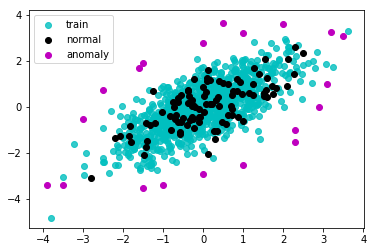

In [4]:
plt.scatter(normal_x[:,0],normal_x[:,1],c="c",alpha=0.8,label='train')
plt.scatter(normal_x_test[:,0],normal_x_test[:,1],c="k",label='normal')
plt.scatter(anomaly_x[:,0],anomaly_x[:,1],c="m",label='anomaly')
plt.legend()
plt.show()

In [5]:
mu = np.mean(normal_x,axis=0)
mu = np.expand_dims(mu,axis=-1)
cov = np.cov(normal_x.T)
print(mu)
print("---------------------")
print(cov)

[[-0.03196291]
 [-0.0212954 ]]
---------------------
[[1.05718427 0.79984527]
 [0.79984527 1.14536341]]


In [6]:
def get_md(all_x,mu,cov):
    """ returns mahalanobis distance
    """
    all_distances = []
    for x in all_x:
        x = np.expand_dims(x,axis=-1)
        distance = ((x-mu).T.dot(cov)).dot(x-mu)
        all_distances.append(float(distance))
        
    return all_distances

In [7]:
anomaly_distances = get_md(anomaly_x,mu,cov)
normal_distances = get_md(normal_x_test,mu,cov)

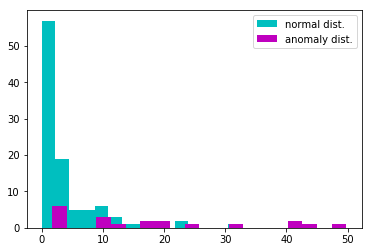

In [8]:
plt.hist(normal_distances,bins=15,color="c",label="normal dist.")
plt.hist(anomaly_distances,bins=20,color="m",label="anomaly dist.")
plt.legend()
plt.show()